# Sampling and the Central Limit Theorem

##### Keywords: central limit theorem, sampling, normal distribution,  standard error, sampling distribution of variance, sampling distribution

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Samples from a population of coin flips

Lets do some more coin flips; this time we'll do them in many replications. We'll establish some terminology at first. 

We will do a large set of replications M, in each of which we will do many coin flips N. We'll call the result of each coin flip an observation, and a single replication a sample of observations. Thus the number of samples is M, and the sample size is N. These samples have been chosen from a population of size $n >> N$.

In [4]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [5]:

def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

We show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [6]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.8,  0.5,  1. ,  0.7,  0.7,  0.6,  0.6,  0.7,  1. ,  0.7,
        0.4,  0.4,  0.4,  0.4,  0.7,  0.7,  0.5,  0.5,  0.5])

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample size from 1 to 1000 in `sample_means`.

In [7]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

To see this lets define, instead, the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [8]:
mean_of_sample_means = [np.mean(means) for means in sample_means]


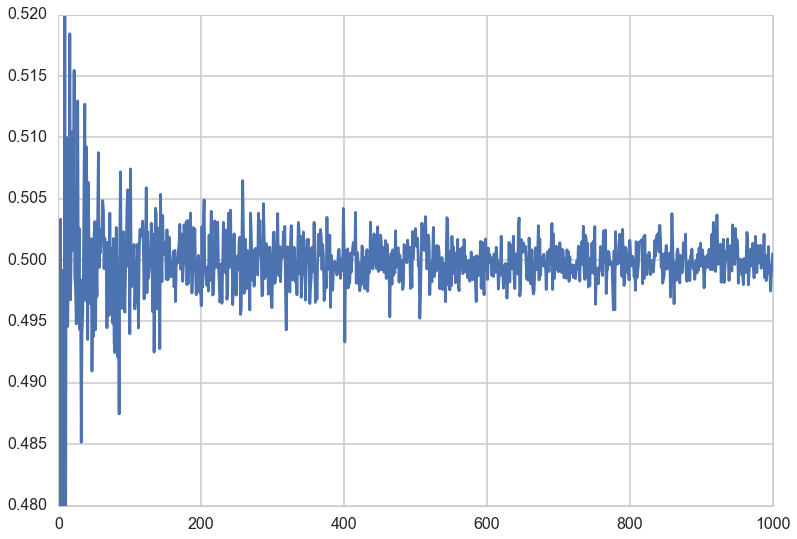

In [9]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.


## The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

$$\begin{eqnarray}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E_{\{R\}}(\bar{x}) &=& \mu
\end{eqnarray}$$

which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates. (Thus there our $E_{\{R\}}$ would be replaced by  some $E_{fs}$ where by $fs$ we wish to indicate the pmf or density of the sampling distribution).

### The sampling distribution as a function of sample size

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [10]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

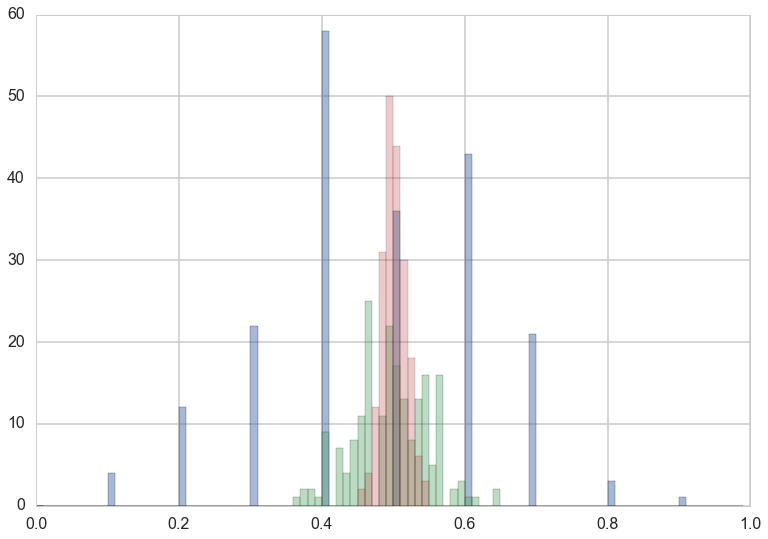

In [11]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100. 

Lets plot the distribution of the mean as a function of sample size.

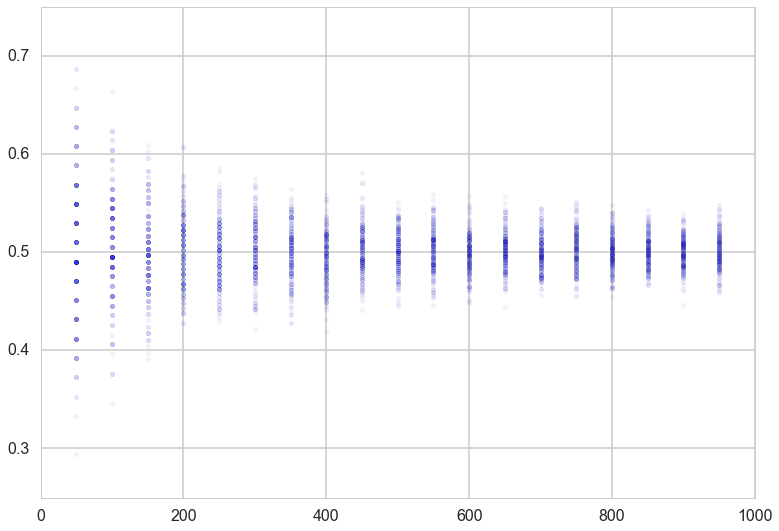

In [13]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

### The variation of the sample mean

Let the underlying distribution from which we have drawn our samples have, additionally to a well defined mean $\mu$, a well defined variance $\sigma^2$. 

Then, as before:

$$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(x_1 + x_2 + ... + x_N) = V_{\{R\}}(x_1) + V_{\{R\}}(x_2) + ... + V_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the variances in the right hand side can be replaced by the population variance using the law of large numbers! Thus:

$$\begin{eqnarray}
V_{\{R\}}(N\,\bar{x}) &=& N\, \sigma^2\\
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray}$$

This simple formula is called **De-Moivre's** formula, and explains the tell-tale triangular plot we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).

The square root of $V$, or the standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the **Standard Error**.

We can obtain the standard deviation of the sampling distribution of the mean at different sample sizes and plot it against the sample size, to confirm the $1/\sqrt(N)$ behaviour. 

In [17]:
std_of_sample_means = [np.std(means) for means in sample_means]

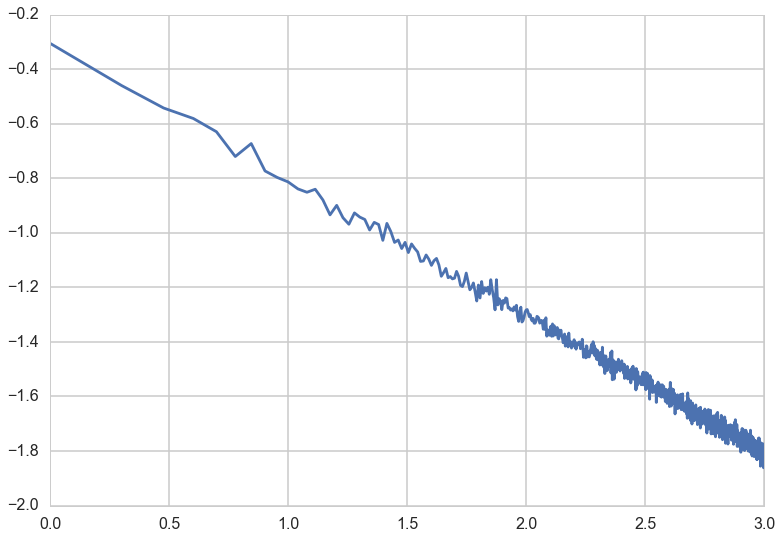

In [18]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means));

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

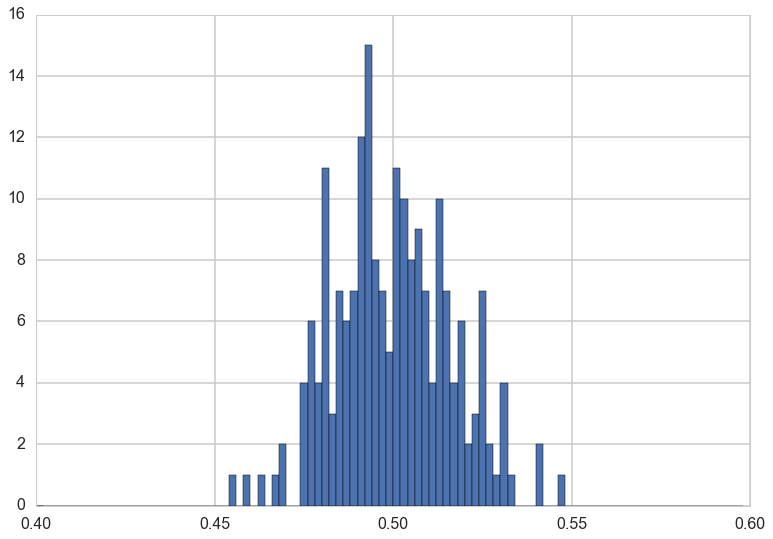

In [19]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

### The Gaussian Distribution

We saw in the last section that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


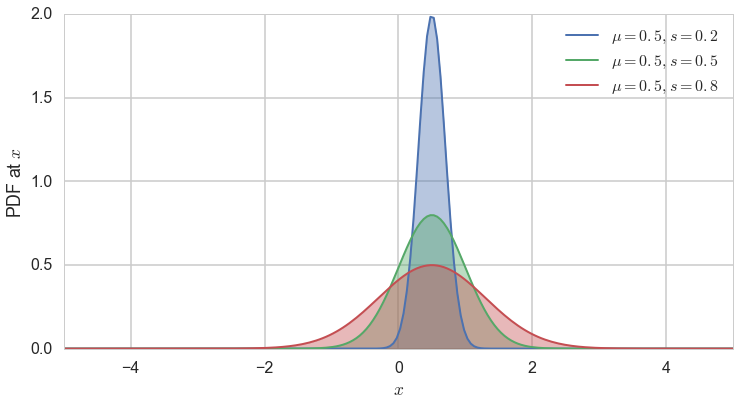

In [23]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], sns.color_palette()[:3]):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, s={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$");

## The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions called Lyapunov conditions, the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.[this has nothing to do with the sampling distribution of the mean but is part of the origin story of the gaussian distribution]

As a rule of thumb, the CLT starts holding at $N \sim 30$.

### What does this all mean?

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$.

The preciseness of saying that we have a gaussian is a huge gain in our expository power. For example, for the case of the weight-watchers program above, a separation of 20lbs is more than 3 standard errors away, which corresponds to being way in the tail of a gaussian distribution. Because we can now quantify the area under the curve, we can say that 99.7\% of the sample means lie within 9lbs of 150. Thus you can way easily reject the possibility that the new sample is from the weight-watchers program with 99.7\% confidence. 

Indeed, the CLT allows us to take the reduction in variance we get from large samples, and make statements in different cases that are quite strong:

1. if we know a lot about the population, and randomly sampled 100 points from it, the sample mean would be with 99.7\% confidence within $0.3\sigma$ of the population mean. And thus, if $\sigma$ is small, the sample mean is quite representative of the population mean.
2. The reverse: if we have a well sampled 100 data points, we could make strong statements about the population as a whole. This is indeed how election polling and other sampling works. 
3. we can infer, as we just did, if a sample is consistent with a population
4. by the same token, you can compare two samples and infer if they are from the same population.

## The sampling distribution of the Variance

At this point you might be curious about what the sampling distribution of the variance looks like, and what can we surmise from it about the variance of the entire sample. We can do this, just like we did for the means. We'll stick with a high number of replicates and plot the mean of the sample variances as well as the truish sampling distribution of the variances at a sample size of 100.

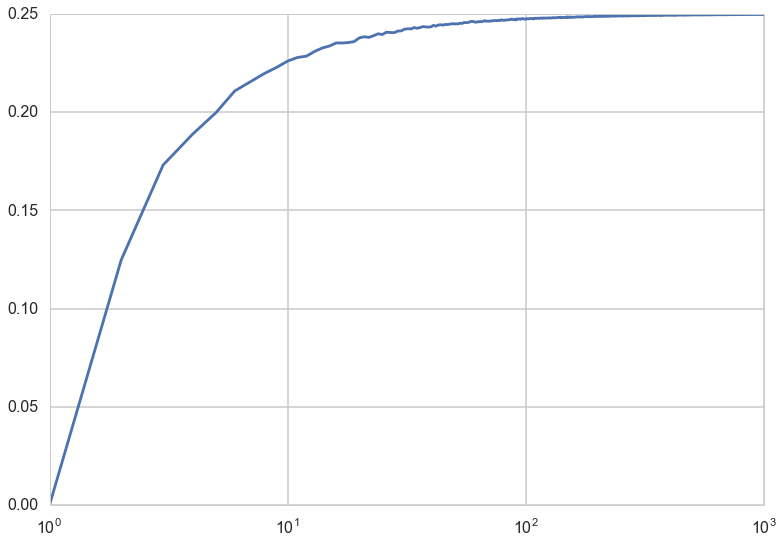

In [24]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

The "mean sample variance" asymptotes to the true variance of 0.25 by a sample size of 100. 

How well does the sample variance estimate the true variance? 

If $V_m$ denotes the variance of a sample, 

$$ N\,V_m = \sum_{i=1}^{N} (x_{mi} - \bar{x_m})^2 = \sum_{i=1}^{N}(x_{mi} - \mu)^2 - N\,(\bar{x_m} - \mu)^2. $$

Then
$$E_{\{R\}}(N\,V_m) = E_{\{R\}}(\sum_{i=1}^{N}(x_{mi} - \mu)^2) - E_{\{R\}}(N\,(\bar{x_m} - \mu)^2)$$
In the asymptotic limit of a very large number of replicates, we can then write
$$E(N\,V) = N\,\sigma^2 - \sigma^2, $$
and thus we have
$$E(V) = \frac{N-1}{N} \,\sigma^2$$.

In other words, the expected value of the sample variance is LESS than the actual variance. This should not be surprising: consider for example a sample of size 1 from the population. There is zero variance! More generally, whenever you sample a population, you tend to pick the more likely members of the population, and so the variance in the sample is less than the variance in the population.

An interesting application of this idea, as Shalizi points out in http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/, is that the loss of variability due to sampling of genes is indeed the origin of genetic drift. More prosaically, the fact that the above graph of expected sample variance against sample size asymptotes to 0.25 is as $\frac{N-1}{N}$ if very close to 1 at large N. 

Or put another way, you ought to correct your sample variances by a factor of $\frac{n}{n-1}$ to estimate the population variance, which itself works as the sampling distribution of the sample variance is rather tight, as seen below.

That is, defining the sample variance with $n-1$ in the denominator instead of $n$ gives you an unbiased eatimator of the true variance. This is why, for example, Pandas will do this by default for series and dataframes. (numpy wont, so beware!).

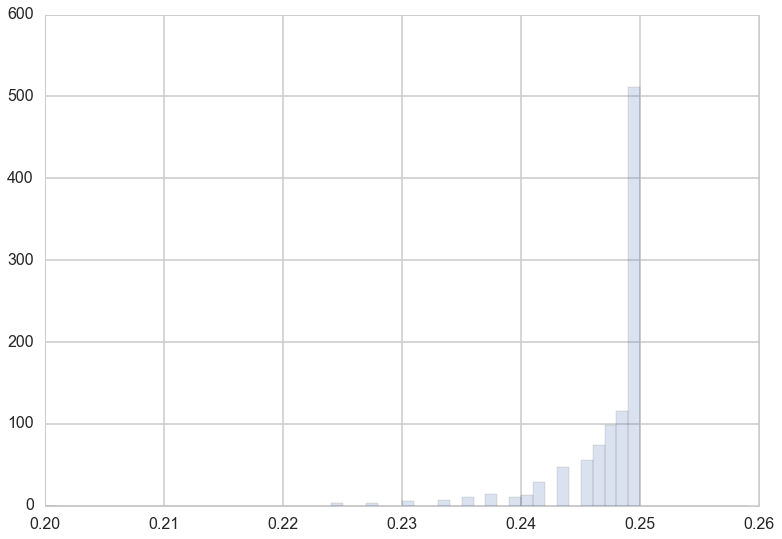

In [25]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);